In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



 *  https://github.com/SamsungLabs/day-to-night.git

 * checked git : https://github.com/fmalato/Day2Night

In [3]:
import os 
from datetime import datetime
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt
from PIL import Image
project_directory = '/content/drive/MyDrive/MLDL'
os.chdir(project_directory)
import random
import torch
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from tqdm import tqdm

import shutil

# 1. distinguish day and night images

In [5]:
input_folder = '/content/drive/MyDrive/MLDL/datasets_vg/pitts30k/images/train/queries'
image_names_list = os.listdir(input_folder)
len(image_names_list )

7416

In [6]:
path = input_folder+'/'+image_names_list[0]
source = '/content/'+image_names_list[0]
print(path)
print(source)
shutil.copyfile( path,source)

/content/drive/MyDrive/MLDL/datasets_vg/pitts30k/images/train/queries/@0584954.57@4477452.62@17@T@040.44338@-079.99824@001584@28@@@@@@pitch2_yaw5@.jpg
/content/@0584954.57@4477452.62@17@T@040.44338@-079.99824@001584@28@@@@@@pitch2_yaw5@.jpg


'/content/@0584954.57@4477452.62@17@T@040.44338@-079.99824@001584@28@@@@@@pitch2_yaw5@.jpg'

In [7]:
def avg_brightness(rgb_image):
    
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    
    ## TODO: Calculate the average brightness using the area of the image
    # and the sum calculated above
    
    area = 600*1100.0  #pixels
    avg = sum_brightness/area
    
    return avg

In [8]:
brightness =[]
for i, image in enumerate(tqdm(image_names_list)):
  path = input_folder +'/'+ image
  img = cv2.imread(path)
  brightness.append(avg_brightness(img))

  

100%|██████████| 7416/7416 [03:03<00:00, 40.44it/s] 


[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'brightness Histogram')]

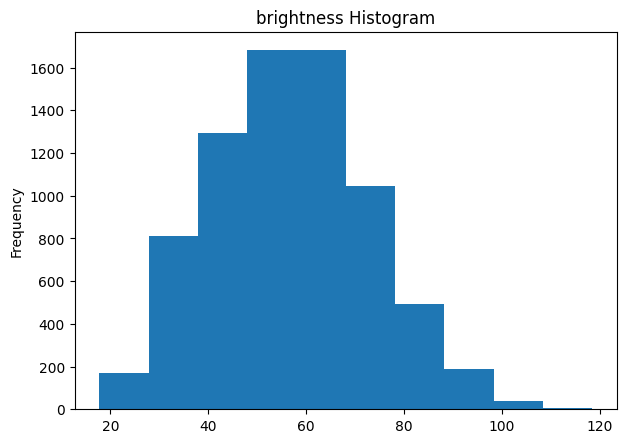

In [9]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
# Plot Histogram on x
brightness_array = np.array(brightness)
plt.hist(brightness_array, bins=10)
plt.gca().set(title='brightness Histogram', ylabel='Frequency')

visulizing some night images


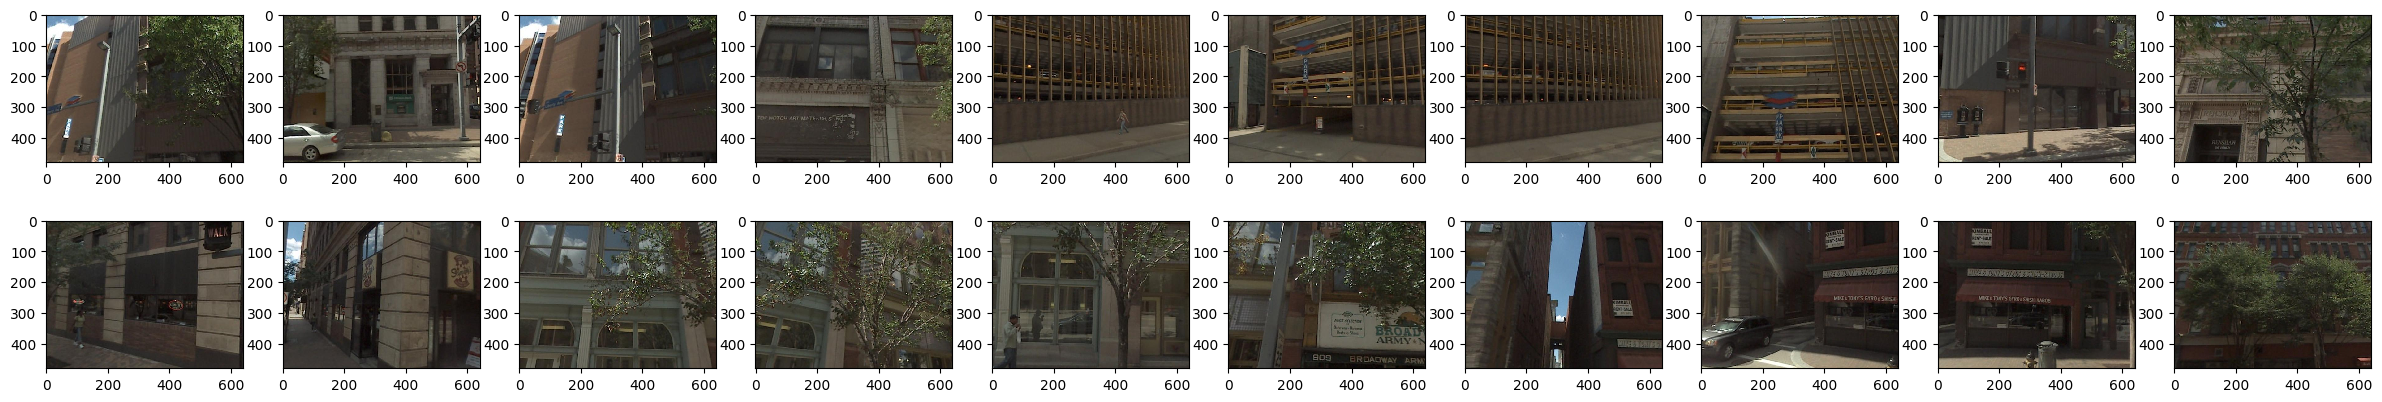

In [16]:
threshhold = 35
indices = np.where(brightness_array<threshhold)
print('visulizing some night images')

fig, axs = plt.subplots(2,10,figsize=(30,5))

for c in range(1,21):
  index =indices[0][c]
  img = cv2.imread(input_folder+'/'+image_names_list[index])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
  plt.subplot(2,10, c)   
      
  plt.imshow(img, cmap="gray",interpolation='none')


we will not transform images with brightness below 35 to night



In [17]:
night_names= [image_names_list[indices[0][i]] for i in range(len(indices[0]))]
print(len(night_names))
night_names[0:5]

683


['@0584919.47@4477554.53@17@T@040.44430@-079.99864@001697@10@@@@@@pitch1_yaw11@.jpg',
 '@0584956.19@4477394.11@17@T@040.44286@-079.99823@002384@26@@@@@@pitch2_yaw3@.jpg',
 '@0584958.79@4477395.01@17@T@040.44286@-079.99820@002387@09@@@@@@pitch1_yaw10@.jpg',
 '@0584958.79@4477395.01@17@T@040.44286@-079.99820@002387@26@@@@@@pitch2_yaw3@.jpg',
 '@0584922.62@4477485.45@17@T@040.44368@-079.99861@002523@27@@@@@@pitch2_yaw4@.jpg']

# synthesis images


In [12]:
os.chdir('/content/drive/MyDrive/MLDL/synthetic/day2night/day2night/UNIT')
"""
Copyright (C) 2018 NVIDIA Corporation.  All rights reserved.
Licensed under the CC BY-NC-SA 4.0 license (https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode).
"""
from __future__ import print_function
from utils import get_config, get_data_loader_folder, pytorch03_to_pytorch04
from trainer import MUNIT_Trainer, UNIT_Trainer

from subprocess import call
from torch.autograd import Variable
from data import ImageFolder
import torchvision.utils as vutils
try:
    from itertools import izip as zip
except ImportError: # will be 3.x series
    pass
from time import time
import sys
import torch
import os
import torch.nn as nn

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
config = get_config('/content/drive/MyDrive/MLDL/synthetic/config.yaml')
data_loader = get_data_loader_folder(input_folder, 1, False, config['new_size'], crop=False)
image_names = ImageFolder(input_folder , transform=None, return_paths=True)

Processed 0 images
Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images
7416
Processed 0 images
Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images
7416


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [14]:
syn_model = UNIT_Trainer(config)
syn_model.resume('/content/drive/MyDrive/MLDL/synthetic/UNIT PT models/UNIT', config)
syn_model.to(device)
# encode =syn_model.gen_a.encode if config['a2b'] else syn_model.gen_b.encode # encode function
# decode = syn_model.gen_b.decode if config['a2b'] else syn_model.gen_a.decode # decode function

encode =syn_model.gen_a.encode 

decode = syn_model.gen_b.decode 


Resume from iteration 388000


#generated 2


In [ ]:
counter = 0
for i, (images, names) in enumerate((zip(data_loader, image_names))):

    if i %10 ==0:
      print('index:   ',i)
    counter +=1 
    # images = Variable(images.cuda(), volatile=True)
    images = images.to(device)
    code, _ = encode(images)
    outputs = decode(code)
    outputs = (outputs + 1) / 2.
    outputs.data
    basename = os.path.basename(names[1])
    path = os.path.join('/content/drive/MyDrive/MLDL/synthetic/generated2',basename)
    if basename not in night_names:
         vutils.save_image(outputs.data, path, padding=0, normalize=True)
    else:
      print('\n this image has not been transformed ',basename)
      source =os.path.join(input_folder,basename)
      print(source)
      print(path)
      
      shutil.copyfile( source,path)
print('{} images have been moved to new directory'.format(counter))

index:    0

 this image has not been transformed  @0584523.97@4477336.74@17@T@040.44238@-080.00333@005087@03@@@@@@pitch1_yaw4@.jpg
/content/drive/MyDrive/MLDL/datasets_vg/pitts30k/images/train/queries/@0584523.97@4477336.74@17@T@040.44238@-080.00333@005087@03@@@@@@pitch1_yaw4@.jpg
/content/drive/MyDrive/MLDL/synthetic/generated2/@0584523.97@4477336.74@17@T@040.44238@-080.00333@005087@03@@@@@@pitch1_yaw4@.jpg

 this image has not been transformed  @0584523.97@4477336.74@17@T@040.44238@-080.00333@005087@09@@@@@@pitch1_yaw10@.jpg
/content/drive/MyDrive/MLDL/datasets_vg/pitts30k/images/train/queries/@0584523.97@4477336.74@17@T@040.44238@-080.00333@005087@09@@@@@@pitch1_yaw10@.jpg
/content/drive/MyDrive/MLDL/synthetic/generated2/@0584523.97@4477336.74@17@T@040.44238@-080.00333@005087@09@@@@@@pitch1_yaw10@.jpg
index:    10

 this image has not been transformed  @0584523.97@4477336.74@17@T@040.44238@-080.00333@005087@10@@@@@@pitch1_yaw11@.jpg
/content/drive/MyDrive/MLDL/datasets_vg/pitts30k/

# visulazie syntetic dataset

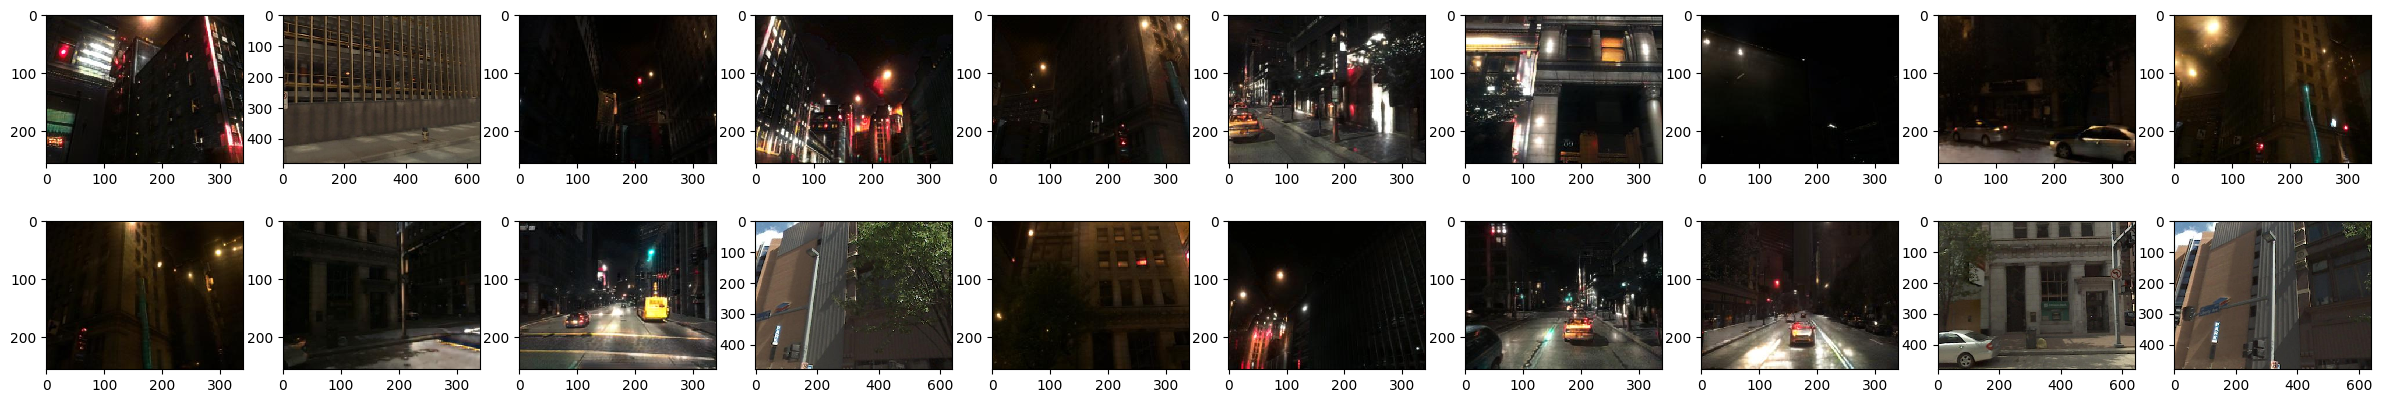

In [ ]:
fig, axs = plt.subplots(2,10,figsize=(30,5))

for c in range(1,21):
  path=   os.path.join('/content/drive/MyDrive/MLDL/synthetic/generated2',image_names_list[c])
  
  try:
    img = cv2.imread( path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  except:
    print(path)
    path=   os.path.join('/content/drive/MyDrive/MLDL/synthetic/generated2',image_names_list[c+50])
    img = cv2.imread( path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

 
  plt.subplot(2,10, c)   
      
  plt.imshow(img, cmap="gray",interpolation='none')
# 

In [ ]:
output_folder = '/content/drive/MyDrive/MLDL/synthetic/generated2'
output_folder_list = os.listdir(output_folder)
len(output_folder_list )

7416

#generated 3

In [18]:
counter = 0
for i, (images, names) in (enumerate((zip(data_loader, image_names)))):

    if i %500 ==0:
      print('index:   ',i)

    # images = Variable(images.cuda(), volatile=True)
    images = images.to(device)
    code, _ = encode(images)
    outputs = decode(code)
    outputs = (outputs + 1) / 2.
    outputs.data
    basename = os.path.basename(names[1])
    basename_=  basename.split('@.jpg')[0]+'nn'+'@.jpg'
    path_n = os.path.join('/content/drive/MyDrive/MLDL/synthetic/generated3',basename_)
    path= os.path.join('/content/drive/MyDrive/MLDL/synthetic/generated3',basename)
    if basename not in night_names and i%5==0:
         vutils.save_image(outputs.data, path_n, padding=0, normalize=True)
    
    
    source =os.path.join(input_folder,basename)      
    shutil.copyfile( source,path)
print('{} images have been moved to new directory'.format(counter))

index:    0
index:    500
index:    1000
index:    1500
index:    2000
index:    2500
index:    3000
index:    3500
index:    4000
index:    4500
index:    5000
index:    5500
index:    6000
index:    6500
index:    7000
0 images have been moved to new directory


In [22]:
output_folder = '/content/drive/MyDrive/MLDL/synthetic/generated3'
output_folder_list = os.listdir(output_folder)
len(output_folder_list )

8761

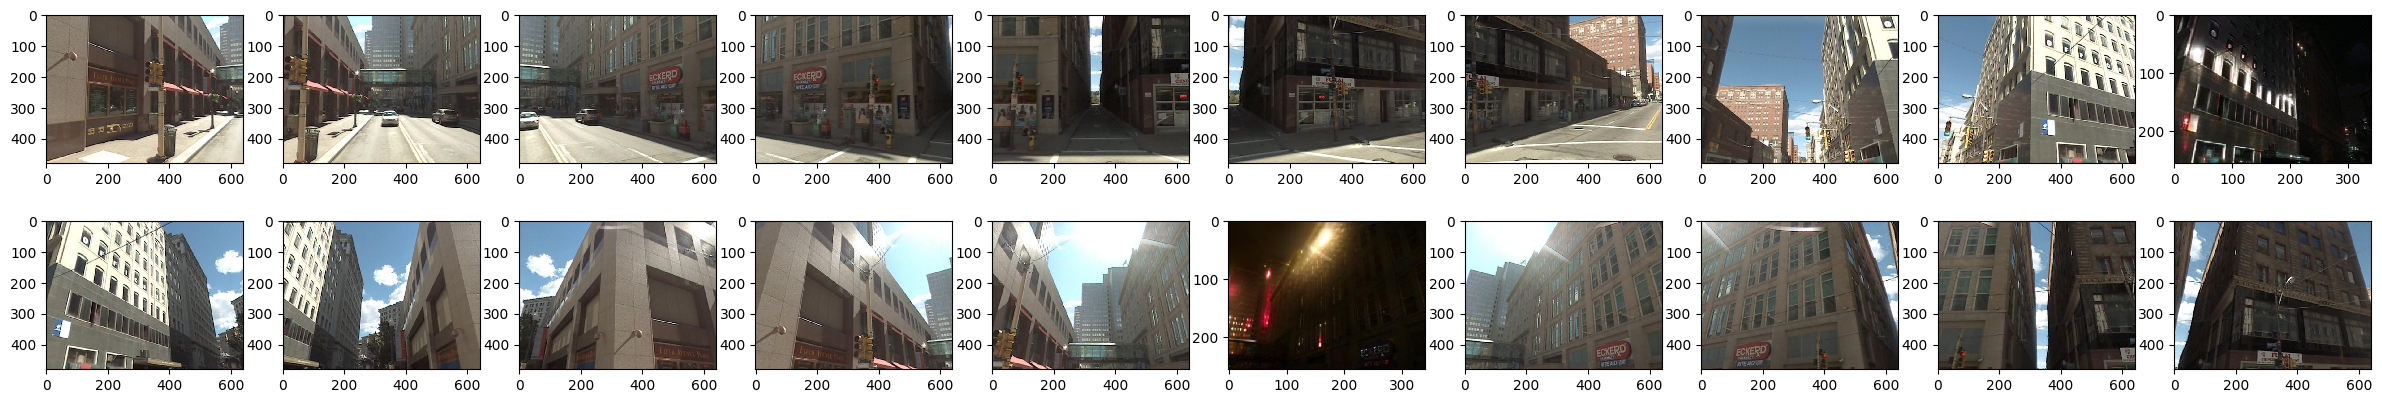

In [20]:
fig, axs = plt.subplots(2,10,figsize=(30,5))
i=1
for c in range(120,140):
  path=   os.path.join('/content/drive/MyDrive/MLDL/synthetic/generated3',output_folder_list[c])
  
  try:
    img = cv2.imread( path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  except:
    print(path)
    path=   os.path.join('/content/drive/MyDrive/MLDL/synthetic/generated3',output_folder_list[c+50])
    img = cv2.imread( path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

 
  plt.subplot(2,10, i)  
  i+=1 
      
  plt.imshow(img, cmap="gray",interpolation='none')